# Data Cleaning and Model Training Process

After acquiring the soccer data in the "final_dataset.csv" file, the prediction process involves several crucial steps:

1.) Data Cleaning: Eliminating irrelevant tables and refining data types for improved analysis.
   
2.) Feature Engineering: Crafting new features to enhance predictive capability and depth of analysis.
   
3.) Feature Column Cleaning: Refining feature columns to ensure data integrity and reliability.
   
4.) Data Splitting: Segregating the dataset into training and test sets to facilitate model evaluation.
   
5.) Model Training: Training various machine learning models on the prepared dataset.
   
6.) Accuracy Assessment: Computing accuracy metrics across multiple models and iteratively refining to enhance performance.

In [1]:
import pandas as pd

In [2]:
# The dataset we acquired through scraping is now used for prediction

matches = pd.read_csv("final_dataset.csv", index_col=0)

In [3]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,team,season
match no.,,,,,,,,,,,,,,,,,,,,,
1,8/11/17,19:45,Premier League,Matchweek 1,Fri,Home,W,4,3,Leicester City,...,Match Report,NaN,27,10,19.7,0,0,0,Arsenal,2018
2,8/19/17,17:30,Premier League,Matchweek 2,Sat,Away,L,0,1,Stoke City,...,Match Report,NaN,18,6,18.1,0,0,0,Arsenal,2018
3,8/27/17,16:00,Premier League,Matchweek 3,Sun,Away,L,0,4,Liverpool,...,Match Report,NaN,8,0,16.6,0,0,0,Arsenal,2018
4,9/9/17,15:00,Premier League,Matchweek 4,Sat,Home,W,3,0,Bournemouth,...,Match Report,NaN,17,9,15.6,1,0,0,Arsenal,2018
6,9/17/17,13:30,Premier League,Matchweek 5,Sun,Away,D,0,0,Chelsea,...,Match Report,NaN,11,2,17.5,0,0,0,Arsenal,2018


In [4]:
matches.shape

(5186, 27)

In [5]:
# 7 years data for 20 teams and 38 matches per team

# In the current season (2024),
# we considered 31 matches for 14 teams and 32 matches for 6 teams as per date as the league is still in progress

7*20*38 - (20*7) + (6)

5186

In [6]:
# Number of matches per each team across the years (Last 3 teams are eliminated each year replacing 3 new teams)

matches["team"].value_counts()

Arsenal             259
Everton             259
Liverpool           259
Manchester City     259
Manchester Utd      259
Newcastle Utd       259
Chelsea             258
Leicester City      228
Southampton         228
Burnley             222
West Ham            222
Brighton            221
Crystal Palace      221
Wolves              221
Aston Villa         184
Bournemouth         183
Watford             152
Fulham              146
Tottenham           145
Leeds United        114
Tottenham           114
Brentford           108
Sheffield Utd       107
Huddersfield         76
Norwich City         76
West Brom            76
Nott'ham Forest      70
 West Ham            38
Swansea City         38
 Crystal Palace      38
Brighton             38
Cardiff City         38
Stoke City           38
Luton Town           32
Name: team, dtype: int64

In [7]:
# Number of matches held in each matchweek over 7 years

matches["round"].value_counts()

Matchweek 1     140
Matchweek 17    140
Matchweek 31    140
Matchweek 32    140
Matchweek 30    140
Matchweek 28    140
Matchweek 27    140
Matchweek 25    140
Matchweek 24    140
Matchweek 23    140
Matchweek 22    140
Matchweek 21    140
Matchweek 2     140
Matchweek 19    140
Matchweek 18    140
Matchweek 20    140
Matchweek 16    140
Matchweek 8     140
Matchweek 3     140
Matchweek 4     140
Matchweek 5     140
Matchweek 15    140
Matchweek 7     140
Matchweek 6     140
Matchweek 9     140
Matchweek 10    140
Matchweek 11    140
Matchweek 12    140
Matchweek 13    140
Matchweek 14    140
Matchweek 26    138
Matchweek 29    128
Matchweek 33    120
Matchweek 34    120
Matchweek 35    120
Matchweek 36    120
Matchweek 37    120
Matchweek 38    120
Name: round, dtype: int64

In [8]:
matches["date"] = pd.to_datetime(matches["date"])

In [9]:
matches.dtypes

date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                       int64
ga                       int64
opponent                object
xg                     float64
xga                    float64
poss                     int64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                       int64
sot                      int64
dist                   float64
fk                       int64
pk                       int64
pkatt                    int64
team                    object
season                   int64
dtype: object

In [10]:
# Deleting unnecessary columns which are not used for prediction

del matches["comp"]

In [11]:
del matches["notes"]

In [12]:
del matches["formation"]

In [13]:
matches['time'] = pd.to_datetime(matches['time'], format='%H:%M').dt.hour

In [14]:
# Assigning a Win as 1, Lose and Draw as 0 to use as a predictor, creating a new column target

matches["target"] = (matches["result"] == "W").astype("int")

In [15]:
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,match report,sh,sot,dist,fk,pk,pkatt,team,season,target
match no.,,,,,,,,,,,,,,,,,,,,,
1,2017-08-11,19,Matchweek 1,Fri,Home,W,4,3,Leicester City,2.5,...,Match Report,27,10,19.7,0,0,0,Arsenal,2018,1
2,2017-08-19,17,Matchweek 2,Sat,Away,L,0,1,Stoke City,1.5,...,Match Report,18,6,18.1,0,0,0,Arsenal,2018,0
3,2017-08-27,16,Matchweek 3,Sun,Away,L,0,4,Liverpool,0.6,...,Match Report,8,0,16.6,0,0,0,Arsenal,2018,0
4,2017-09-09,15,Matchweek 4,Sat,Home,W,3,0,Bournemouth,2.2,...,Match Report,17,9,15.6,1,0,0,Arsenal,2018,1
6,2017-09-17,13,Matchweek 5,Sun,Away,D,0,0,Chelsea,1.4,...,Match Report,11,2,17.5,0,0,0,Arsenal,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2024-03-02,15,Matchweek 27,Sat,Away,L,0,3,Newcastle Utd,0.8,...,Match Report,12,3,15.9,0,0,0,Wolves,2024,0
33,2024-03-09,15,Matchweek 28,Sat,Home,W,2,1,Fulham,0.8,...,Match Report,8,3,16.3,0,0,0,Wolves,2024,1
35,2024-03-30,17,Matchweek 30,Sat,Away,L,0,2,Aston Villa,1.5,...,Match Report,13,3,14.6,1,0,0,Wolves,2024,0


In [16]:
# Converting venue string to categorical 1 and 0 for Home and Away games respectively

matches["venue_type_num"] = matches["venue"].astype("category").cat.codes

In [17]:
# Converting opposition team to categorical column (assigned 1 to 19) as opposition for each individual team

matches["opponent_num"] = matches["opponent"].astype("category").cat.codes

In [18]:
# Using regular expressions to use only hour and eliminate the minutes in time column

#matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")

In [19]:
# Assigning day number in a week Sun -> 0 to Sat -> 6 

matches["day_num"] = matches["date"].dt.dayofweek

In [20]:
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,dist,fk,pk,pkatt,team,season,target,venue_type_num,opponent_num,day_num
match no.,,,,,,,,,,,,,,,,,,,,,
1,2017-08-11,19,Matchweek 1,Fri,Home,W,4,3,Leicester City,2.5,...,19.7,0,0,0,Arsenal,2018,1,1,13,4
2,2017-08-19,17,Matchweek 2,Sat,Away,L,0,1,Stoke City,1.5,...,18.1,0,0,0,Arsenal,2018,0,0,23,5
3,2017-08-27,16,Matchweek 3,Sun,Away,L,0,4,Liverpool,0.6,...,16.6,0,0,0,Arsenal,2018,0,0,14,6
4,2017-09-09,15,Matchweek 4,Sat,Home,W,3,0,Bournemouth,2.2,...,15.6,1,0,0,Arsenal,2018,1,1,2,5
6,2017-09-17,13,Matchweek 5,Sun,Away,D,0,0,Chelsea,1.4,...,17.5,0,0,0,Arsenal,2018,0,0,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2024-03-02,15,Matchweek 27,Sat,Away,L,0,3,Newcastle Utd,0.8,...,15.9,0,0,0,Wolves,2024,0,0,18,5
33,2024-03-09,15,Matchweek 28,Sat,Home,W,2,1,Fulham,0.8,...,16.3,0,0,0,Wolves,2024,1,1,10,5
35,2024-03-30,17,Matchweek 30,Sat,Away,L,0,2,Aston Villa,1.5,...,14.6,1,0,0,Wolves,2024,0,0,1,5


# Machine Learning Models

Based on our dataset and the features used, the Machine Learning Models that would be accurate are Random Forest Classifier and the CatBoost Gradient Based algorithm. 
We used two algorithms for comparison to check which algorithm is better for our model.

Furthur steps conducted:

1. Split dataset into 80% training and 20% testing data.
2. Selected Random Forest Classifier and CatBoost Gradient Boosting for prediction.
3. Trained models on training data and evaluated on testing data for accuracy.
4. Improved precision by computing rolling averages, resulting in a 10% increase.
5. Merged predicted outcomes with dataset to create prediction table.
6. Exported prediction table to CSV for analysis and comparison with actual outcomes.

# Model: Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [22]:
# Splitiing the data into 80 % train and 20% test 

num_records_train = 4150

train = matches.head(num_records_train) 

test = matches.tail(len(matches) - num_records_train)

In [23]:
# The feature columns included above are used as predictors

predictors = ["venue_type_num", "opponent_num", "day_num"]

In [24]:
rf.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [25]:
preds_rf = rf.predict(test[predictors])

In [26]:
# Testing the accuracy based on the predictors for Random Forest model

from sklearn.metrics import accuracy_score
acc_rf = accuracy_score(test["target"], preds_rf)
print('Accuracy using Random Forest: ',(acc_rf*100))

Accuracy using Random Forest:  61.196911196911195


In [27]:
# Checking the number of wins and losses for predicted vs actual outcome

combined_rf = pd.DataFrame(dict(actual=test["target"], predicted=preds_rf))

pd.crosstab(index=combined_rf["actual"], columns=combined_rf["predicted"])

predicted,0,1
actual,,
0,532,104
1,298,102


In [28]:
# Precision score to check win prediction percentage

from sklearn.metrics import precision_score

val_rf = precision_score(test["target"], preds_rf)
print('Precision using Random Forest: ',(val_rf*100))

Precision using Random Forest:  49.51456310679612


# Model: CatBoost Gradient Based Algorithm
    
Reason for choosing CatBoost to compare against Random Forest Classifier

1. CatBoost handles categorical features efficiently without requiring extensive preprocessing.
2. CatBoost's ordered boosting algorithm effectively prevents overfitting on complex datasets.
3. CatBoost offers better interpretability of feature importance compared to Random Forest Classifier.
4. Exploring CatBoost aimed to leverage its optimized implementation for potentially higher predictive accuracy.

In [ ]:
# pip install catboost

In [29]:
import catboost as cb
from sklearn.metrics import accuracy_score
cb_model = cb.CatBoostClassifier(n_estimators=100, random_state=1)

In [30]:
# Splitiing the data into 80 % train and 20% test

num_records_train = 4150

train = matches.head(num_records_train) 

test = matches.tail(len(matches) - num_records_train)

In [31]:
predictors = ["venue_type_num", "opponent_num", "day_num"]

In [32]:
cb_model.fit(train[predictors], train["target"])

Learning rate set to 0.156257
0:	learn: 0.6836833	total: 59.7ms	remaining: 5.91s
1:	learn: 0.6747496	total: 60.4ms	remaining: 2.96s
2:	learn: 0.6654613	total: 61.2ms	remaining: 1.98s
3:	learn: 0.6619554	total: 61.7ms	remaining: 1.48s
4:	learn: 0.6594243	total: 62.4ms	remaining: 1.18s
5:	learn: 0.6576149	total: 62.8ms	remaining: 984ms
6:	learn: 0.6524860	total: 63.7ms	remaining: 846ms
7:	learn: 0.6511261	total: 64.2ms	remaining: 738ms
8:	learn: 0.6477862	total: 64.9ms	remaining: 656ms
9:	learn: 0.6445940	total: 65.5ms	remaining: 590ms
10:	learn: 0.6422703	total: 66.2ms	remaining: 536ms
11:	learn: 0.6404444	total: 66.9ms	remaining: 490ms
12:	learn: 0.6390983	total: 67.5ms	remaining: 452ms
13:	learn: 0.6372003	total: 68.3ms	remaining: 419ms
14:	learn: 0.6364561	total: 68.9ms	remaining: 391ms
15:	learn: 0.6357574	total: 69.8ms	remaining: 366ms
16:	learn: 0.6346726	total: 70.5ms	remaining: 344ms
17:	learn: 0.6335408	total: 71.2ms	remaining: 324ms
18:	learn: 0.6326044	total: 71.8ms	remaining

In [33]:
preds_cb = cb_model.predict(test[predictors])

In [34]:
# Testing the accuracy based on the predictors for CatBoost model

acc = accuracy_score(test["target"], preds_cb)

print("Accuracy using CatBoost: ", (acc*100))

Accuracy using CatBoost:  62.16216216216216


In [35]:
# Checking the number of wins and losses for predicted vs actual outcome

combined_cb = pd.DataFrame(dict(actual=test["target"], predicted=preds_cb))

pd.crosstab(index=combined_cb["actual"], columns=combined_cb["predicted"])

predicted,0,1
actual,,
0,536,100
1,292,108


In [36]:
# Precision score to check win prediction percentage

from sklearn.metrics import precision_score

val_cb = precision_score(test["target"], preds_cb)
print('Precision using CatBoost: ',(val_cb*100))

Precision using CatBoost:  51.92307692307693


In [37]:
# Grouping matches by team

grouped_matches = matches.groupby("team")

In [38]:
group = grouped_matches.get_group("Arsenal").sort_values("date")

In [39]:
group

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,dist,fk,pk,pkatt,team,season,target,venue_type_num,opponent_num,day_num
match no.,,,,,,,,,,,,,,,,,,,,,
1,2017-08-11,19,Matchweek 1,Fri,Home,W,4,3,Leicester City,2.5,...,19.7,0,0,0,Arsenal,2018,1,1,13,4
2,2017-08-19,17,Matchweek 2,Sat,Away,L,0,1,Stoke City,1.5,...,18.1,0,0,0,Arsenal,2018,0,0,23,5
3,2017-08-27,16,Matchweek 3,Sun,Away,L,0,4,Liverpool,0.6,...,16.6,0,0,0,Arsenal,2018,0,0,14,6
4,2017-09-09,15,Matchweek 4,Sat,Home,W,3,0,Bournemouth,2.2,...,15.6,1,0,0,Arsenal,2018,1,1,2,5
6,2017-09-17,13,Matchweek 5,Sun,Away,D,0,0,Chelsea,1.4,...,17.5,0,0,0,Arsenal,2018,0,0,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,2024-03-04,20,Matchweek 27,Mon,Away,W,6,0,Sheffield Utd,2.3,...,15.6,1,0,0,Arsenal,2024,1,0,21,0
38,2024-03-09,17,Matchweek 28,Sat,Home,W,2,1,Brentford,1.3,...,16.4,0,0,0,Arsenal,2024,1,1,3,5
40,2024-03-31,16,Matchweek 30,Sun,Away,D,0,0,Manchester City,0.7,...,14.2,0,0,0,Arsenal,2024,0,0,16,6


In [40]:
# Using new features such as rolling averages to improve the precision rate


def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [41]:
# The new features which are added

cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [42]:
rolling_averages(group, cols, new_cols)

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,opponent_num,day_num,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
match no.,,,,,,,,,,,,,,,,,,,,,
4,2017-09-09,15,Matchweek 4,Sat,Home,W,3,0,Bournemouth,2.2,...,2,5,1.333333,2.666667,17.666667,5.333333,18.133333,0.000000,0.000000,0.000000
6,2017-09-17,13,Matchweek 5,Sun,Away,D,0,0,Chelsea,1.4,...,7,6,1.000000,1.666667,14.333333,5.000000,16.766667,0.333333,0.000000,0.000000
8,2017-09-25,20,Matchweek 6,Mon,Home,W,2,0,West Brom,2.2,...,27,0,1.000000,1.333333,12.000000,3.666667,16.566667,0.333333,0.000000,0.000000
10,2017-10-01,12,Matchweek 7,Sun,Home,W,2,0,Brighton,2.4,...,4,6,1.666667,0.000000,14.333333,5.333333,17.400000,1.333333,0.333333,0.333333
11,2017-10-14,17,Matchweek 8,Sat,Away,L,1,2,Watford,1.0,...,26,5,1.333333,0.000000,17.000000,5.000000,18.333333,1.666667,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,2024-03-04,20,Matchweek 27,Mon,Away,W,6,0,Sheffield Utd,2.3,...,21,0,5.000000,0.333333,19.000000,8.000000,15.533333,0.333333,0.666667,0.666667
38,2024-03-09,17,Matchweek 28,Sat,Home,W,2,1,Brentford,1.3,...,3,5,5.000000,0.333333,18.333333,7.333333,15.400000,0.666667,0.333333,0.333333
40,2024-03-31,16,Matchweek 30,Sun,Away,D,0,0,Manchester City,0.7,...,16,6,4.000000,0.666667,19.000000,7.000000,15.266667,0.333333,0.000000,0.000000


In [43]:
# Adding rolling averages to the team data  

matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [44]:
matches_rolling

date  time         round  day venue result  \
team             match no.                                                    
 West Ham        3         2021-09-11    15   Matchweek 4  Sat  Away      D   
                 5         2021-09-19    14   Matchweek 5  Sun  Home      L   
                 7         2021-09-25    15   Matchweek 6  Sat  Away      W   
                 9         2021-10-03    14   Matchweek 7  Sun  Home      L   
                 10        2021-10-17    14   Matchweek 8  Sun  Away      W   
...                               ...   ...           ...  ...   ...    ...   
 Crystal Palace  35        2021-05-08    15  Matchweek 35  Sat  Away      W   
                 36        2021-05-11    20  Matchweek 32  Tue  Away      L   
                 37        2021-05-16    12  Matchweek 36  Sun  Home      W   
                 38        2021-05-19    19  Matchweek 37  Wed  Home      L   
                 39        2021-05-23    16  Matchweek 38  Sun  Away      L   

                            gf  ga        opponent   xg  ...  opponent_num  \
team             match no.                               ...                 
 West Ham        3           0   0     Southampton  0.7  ...            22   
                 5           1   2  Manchester Utd  1.6  ...            17   
                 7           2   1    Leeds United  1.6  ...            12   
                 9           1   2       Brentford  1.5  ...             3   
                 10          1   0         Everton  1.2  ...             9   
...                         ..  ..             ...  ...  ...           ...   
 Crystal Palace  35          2   0   Sheffield Utd  2.0  ...            21   
                 36          1   3     Southampton  1.5  ...            22   
                 37          3   2     Aston Villa  1.9  ...             1   
                 38          1   3         Arsenal  1.0  ...             0   
                 39          0   2       Liverpool  0.6  ...            14   

                            day_num  gf_rolling ga_rolling sh_rolling  \
team             match no.                                              
 West Ham        3                5    3.333333   1.666667  16.666667   
                 5                6    2.000000   1.000000  15.333333   
                 7                5    1.000000   1.333333  13.000000   
                 9                6    1.000000   1.000000  15.000000   
                 10               6    1.333333   1.666667  16.666667   
...                             ...         ...        ...        ...   
 Crystal Palace  35               5    0.666667   2.666667   4.666667   
                 36               1    1.000000   1.333333  11.333333   
                 37               6    1.000000   1.666667  13.333333   
                 38               2    2.000000   1.666667  18.000000   
                 39               6    1.666667   2.666667  15.000000   

                           sot_rolling  dist_rolling  fk_rolling  pk_rolling  \
team             match no.                                                     
 West Ham        3            6.000000     15.400000    0.333333         0.0   
                 5            4.666667     16.366667    0.333333         0.0   
                 7            3.333333     19.066667    0.333333         0.0   
                 9            4.000000     20.066667    1.000000         0.0   
                 10           4.666667     18.966667    1.000000         0.0   
...                                ...           ...         ...         ...   
 Crystal Palace  35           2.333333     13.366667    0.000000         0.0   
                 36           4.666667     16.766667    0.333333         0.0   
                 37           5.000000     18.200000    0.666667         0.0   
                 38           6.333333     17.666667    1.333333         0.0   
                 39           5.666667     16.833333    1.000000         0.0   


In [45]:
matches_rolling = matches_rolling.droplevel('team')

In [46]:
matches_rolling

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,opponent_num,day_num,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
match no.,,,,,,,,,,,,,,,,,,,,,
3,2021-09-11,15,Matchweek 4,Sat,Away,D,0,0,Southampton,0.7,...,22,5,3.333333,1.666667,16.666667,6.000000,15.400000,0.333333,0.0,0.333333
5,2021-09-19,14,Matchweek 5,Sun,Home,L,1,2,Manchester Utd,1.6,...,17,6,2.000000,1.000000,15.333333,4.666667,16.366667,0.333333,0.0,0.000000
7,2021-09-25,15,Matchweek 6,Sat,Away,W,2,1,Leeds United,1.6,...,12,5,1.000000,1.333333,13.000000,3.333333,19.066667,0.333333,0.0,0.333333
9,2021-10-03,14,Matchweek 7,Sun,Home,L,1,2,Brentford,1.5,...,3,6,1.000000,1.000000,15.000000,4.000000,20.066667,1.000000,0.0,0.333333
10,2021-10-17,14,Matchweek 8,Sun,Away,W,1,0,Everton,1.2,...,9,6,1.333333,1.666667,16.666667,4.666667,18.966667,1.000000,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2021-05-08,15,Matchweek 35,Sat,Away,W,2,0,Sheffield Utd,2.0,...,21,5,0.666667,2.666667,4.666667,2.333333,13.366667,0.000000,0.0,0.000000
36,2021-05-11,20,Matchweek 32,Tue,Away,L,1,3,Southampton,1.5,...,22,1,1.000000,1.333333,11.333333,4.666667,16.766667,0.333333,0.0,0.000000
37,2021-05-16,12,Matchweek 36,Sun,Home,W,3,2,Aston Villa,1.9,...,1,6,1.000000,1.666667,13.333333,5.000000,18.200000,0.666667,0.0,0.333333


In [47]:
matches_rolling.index = range(matches_rolling.shape[0])

In [48]:
matches_rolling

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,opponent_num,day_num,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2021-09-11,15,Matchweek 4,Sat,Away,D,0,0,Southampton,0.7,...,22,5,3.333333,1.666667,16.666667,6.000000,15.400000,0.333333,0.0,0.333333
1,2021-09-19,14,Matchweek 5,Sun,Home,L,1,2,Manchester Utd,1.6,...,17,6,2.000000,1.000000,15.333333,4.666667,16.366667,0.333333,0.0,0.000000
2,2021-09-25,15,Matchweek 6,Sat,Away,W,2,1,Leeds United,1.6,...,12,5,1.000000,1.333333,13.000000,3.333333,19.066667,0.333333,0.0,0.333333
3,2021-10-03,14,Matchweek 7,Sun,Home,L,1,2,Brentford,1.5,...,3,6,1.000000,1.000000,15.000000,4.000000,20.066667,1.000000,0.0,0.333333
4,2021-10-17,14,Matchweek 8,Sun,Away,W,1,0,Everton,1.2,...,9,6,1.333333,1.666667,16.666667,4.666667,18.966667,1.000000,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5070,2021-05-08,15,Matchweek 35,Sat,Away,W,2,0,Sheffield Utd,2.0,...,21,5,0.666667,2.666667,4.666667,2.333333,13.366667,0.000000,0.0,0.000000
5071,2021-05-11,20,Matchweek 32,Tue,Away,L,1,3,Southampton,1.5,...,22,1,1.000000,1.333333,11.333333,4.666667,16.766667,0.333333,0.0,0.000000
5072,2021-05-16,12,Matchweek 36,Sun,Home,W,3,2,Aston Villa,1.9,...,1,6,1.000000,1.666667,13.333333,5.000000,18.200000,0.666667,0.0,0.333333
5073,2021-05-19,19,Matchweek 37,Wed,Home,L,1,3,Arsenal,1.0,...,0,2,2.000000,1.666667,18.000000,6.333333,17.666667,1.333333,0.0,0.333333


In [49]:
# Based on the rolling averages, calculating the precision score 

def make_predictions(data, predictors):
    train = data[data["date"] < '2022-01-01']
    test = data[data["date"] > '2022-01-01']
    rf.fit(train[predictors], train["target"])
    preds_rf = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual_value=test["target"], predicted_value=preds_rf), index=test.index)
    prec_rf = precision_score(test["target"], preds_rf)
    return combined, prec_rf

In [50]:
combined, prec_rf = make_predictions(matches_rolling, predictors + new_cols)

In [51]:
# Comparison between actual precision and improved precision

print('Initial precision for Random Forest: ',(val_rf*100))
print('Improved precision due to rolling averages: ', (prec_rf*100))

Initial precision for Random Forest:  49.51456310679612
Improved precision due to rolling averages:  53.987730061349694


In [52]:
# Combining the team details to the prediction table 

combined = combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)

In [53]:
combined

,actual_value,predicted_value,date,team,opponent,result
17,1,1,2022-01-12,West Ham,Norwich City,W
18,0,1,2022-01-16,West Ham,Leeds United,L
19,0,0,2022-01-22,West Ham,Manchester Utd,L
20,1,0,2022-02-08,West Ham,Watford,W
21,0,0,2022-02-13,West Ham,Leicester City,D
...,...,...,...,...,...,...
5038,0,0,2024-03-02,Wolves,Newcastle Utd,L
5039,1,0,2024-03-09,Wolves,Fulham,W
5040,0,0,2024-03-30,Wolves,Aston Villa,L
5041,0,0,2024-04-02,Wolves,Burnley,D


In [54]:
merged = combined.merge(combined, left_on=["date", "team"], right_on=["date", "opponent"])

In [55]:
# Final merged dataset with the outcomes

merged

,actual_value_x,predicted_value_x,date,team_x,opponent_x,result_x,actual_value_y,predicted_value_y,team_y,opponent_y,result_y
0,0,1,2022-01-23,Arsenal,Burnley,D,0,0,Burnley,Arsenal,D
1,1,0,2022-02-10,Arsenal,Wolves,W,0,0,Wolves,Arsenal,L
2,1,1,2022-02-19,Arsenal,Brentford,W,0,0,Brentford,Arsenal,L
3,1,1,2022-02-24,Arsenal,Wolves,W,0,0,Wolves,Arsenal,L
4,1,0,2022-03-06,Arsenal,Watford,W,0,0,Watford,Arsenal,L
...,...,...,...,...,...,...,...,...,...,...,...
1739,0,0,2024-03-02,Wolves,Newcastle Utd,L,1,1,Newcastle Utd,Wolves,W
1740,1,0,2024-03-09,Wolves,Fulham,W,0,0,Fulham,Wolves,L
1741,0,0,2024-03-30,Wolves,Aston Villa,L,1,0,Aston Villa,Wolves,W
1742,0,0,2024-04-02,Wolves,Burnley,D,0,0,Burnley,Wolves,D


In [56]:
merged[(merged["predicted_value_x"] == 1) & (merged["predicted_value_y"] ==0)]["actual_value_x"].value_counts()

1    234
0    173
Name: actual_value_x, dtype: int64

# Predicted Outcome Table

The results obtained with predicted outcome vs actual outcome for each team against all other teams in both home and away games is stored in a csv file for comparison

In [57]:
# The predicted results are stored in a csv file in order to verify the outcomes

# merged.to_csv('predicted_outcomes.csv')

# Improving Accuracy

As the accuracy is around 60% for both Random Forest Classifier and CatBoost algorithms, we plan to increase the accuracy through the following steps:

1. One-hot encoding transforms categorical features like teams and venues into numerical representations that the model can understand, ensuring it doesn't mistakenly interpret these categories as having a specific order.
2. Standard scaling makes sure that features like match statistics are on a level playing field, so one feature's large values don't unfairly influence the model's decisions over others.
3. By doing this, we're essentially preparing our data in a way that makes it easier for the RandomForestClassifier to learn from, potentially resulting in better predictions of match outcomes.

In [58]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

In [59]:
# Load the dataset

matches = pd.read_csv("final_dataset.csv")

# Convert 'time' from string to a numeric value (hours are considered)

matches['time'] = pd.to_datetime(matches['time'], format='%H:%M').dt.hour

# Correct the date parsing and binary encoding for the target variable

matches['date'] = pd.to_datetime(matches['date'], format='%m/%d/%y')
matches['result'] = matches['result'].map({'W': 1, 'L': 0, 'D': 0})


# Exclude unwanted features containing unnecessary data

matches.drop(['notes', 'attendance', 'match no.'], axis=1, inplace=True)

In [60]:
# Define categorical and numeric columns

categorical_features = matches.select_dtypes(include=['object']).columns.tolist()
numeric_features = matches.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'result' from numeric features as we consider it as testing data

numeric_features.remove('result')  

# Preprocessing for categorical and numeric data

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features),
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())  # Normalize numeric features
        ]), numeric_features)
    ])


In [61]:
# Define the model with pipeline

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=80, max_depth=10, random_state=1))  # Adjusted to fewer trees and shallower depth
])

# Model parameters

params = {
    'classifier__min_samples_split': [6, 8, 10]  # Adjusted splits to potentially increase bias
}

# Split the dataset, X as training data and y -> results as the testing data

X = matches.drop(['result', 'date'], axis=1)  
y = matches['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit model and evaluate

clf = GridSearchCV(model, params, cv=5, return_train_score=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

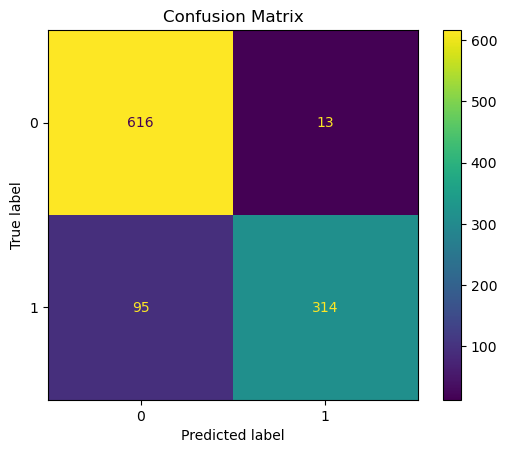

In [62]:
# Display confusion matrix

''' According to this matrix:
The model has the following values for the number of matches

Actual Loss vs Predicted Loss - 616 
Actual Loss vs Predicted Win  - 13
Actual Win vs Predicted Loss  - 95
Actual Win vs Predicted Win   - 314

930  - accurate predictions
1038 - inaccurate predictions

930/1038 - accuracy
'''

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [63]:
930/1038

0.8959537572254336

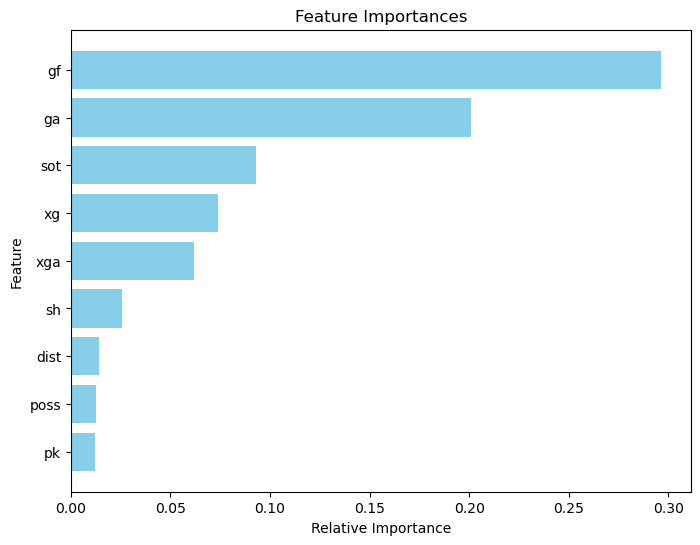

In [64]:
# Retrieve the feature names from the one-hot encoder and numeric features

feature_names = np.concatenate([
    clf.best_estimator_.named_steps['preprocessor'].transformers_[0][1].named_steps['onehot'].get_feature_names_out(),
    numeric_features
])

# Get the feature importances - which feature mainly determines the accuracy of the model

importances = clf.best_estimator_.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1][:9]  

plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

In [65]:
print("Accuracy: ",(accuracy*100))


Accuracy:  89.59537572254335


In [67]:
from sklearn.metrics import classification_report

# Compute classification report

report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       629
           1       0.96      0.77      0.85       409

    accuracy                           0.90      1038
   macro avg       0.91      0.87      0.89      1038
weighted avg       0.90      0.90      0.89      1038

